**Image Denoising in Orthodontist Usig Autoencoders**

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/Dataset'

In [ ]:
import os

folder_contents = os.listdir(folder_path)

for item in folder_contents:
    print(item)

1.jpg
10.jpg
102.jpg
103.jpg
101.jpg
100.jpg
104.jpg
107.jpg
109.jpg
106.jpg
108.jpg
11.jpg
105.jpg
111.jpg
115.jpg
118.jpg
113.jpg
117.jpg
119.jpg
116.jpg
110.jpg
114.jpg
112.jpg
120.jpg
12.jpg
13.jpg
19.jpg
17.jpg
14.jpg
23.jpg
2.jpg
21.jpg
16.jpg
15.jpg
22.jpg
20.jpg
18.jpg
26.jpg
25.jpg
24.jpg
34.jpg
31.jpg
29.jpg
27.jpg
28.jpg
30.jpg
33.jpg
32.jpg
3.jpg
38.jpg
4.jpg
40.jpg
36.jpg
39.jpg
35.jpg
37.jpg
43.jpg
42.jpg
41.jpg
45.jpg
46.jpg
44.jpg
47.jpg
49.jpg
53.jpg
48.jpg
52.jpg
5.jpg
50.jpg
51.jpg
57.jpg
56.jpg
55.jpg
54.jpg
59.jpg
6.jpg
61.jpg
60.jpg
58.jpg
63.jpg
62.jpg
65.jpg
66.jpg
64.jpg
67.jpg
68.jpg
70.jpg
7.jpg
71.jpg
72.jpg
69.jpg
73.jpg
76.jpg
79.jpg
78.jpg
74.jpg
75.jpg
77.jpg
81.jpg
80.jpg
86.jpg
8.jpg
83.jpg
82.jpg
85.jpg
84.jpg
91.jpg
90.jpg
87.jpg
92.jpg
9.jpg
88.jpg
89.jpg
93.jpg
94.jpg
96.jpg
95.jpg
99.jpg
97.jpg
98.jpg


In [ ]:
pip install Keras

In [ ]:
from keras.preprocessing import image

In [ ]:
train_images = sorted(os.listdir('/content/drive/MyDrive/Dataset'))

In [ ]:
train_image = []
for im in train_images:
    img = image.load_img('/content/drive/MyDrive/Dataset/'+ im, target_size=(64,64), color_mode= 'grayscale')
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
train_df = np.array(train_image)

In [ ]:
import matplotlib.pyplot as plt

def show_img(dataset):
    f, ax = plt.subplots(1, 5)
    f.set_size_inches(40, 20)
    for i in range(5, 10):
        ax[i - 5].imshow(dataset[i].reshape(64, 64), cmap='gray')
    plt.show()

In [ ]:
def add_noice(image):
    row,col,ch= image.shape
    mean = 0
    sigma = 1
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss*0.07
    return noisy

In [ ]:
noised_df= []

for img in train_df:
    noisy= add_noice(img)
    noised_df.append(noisy)

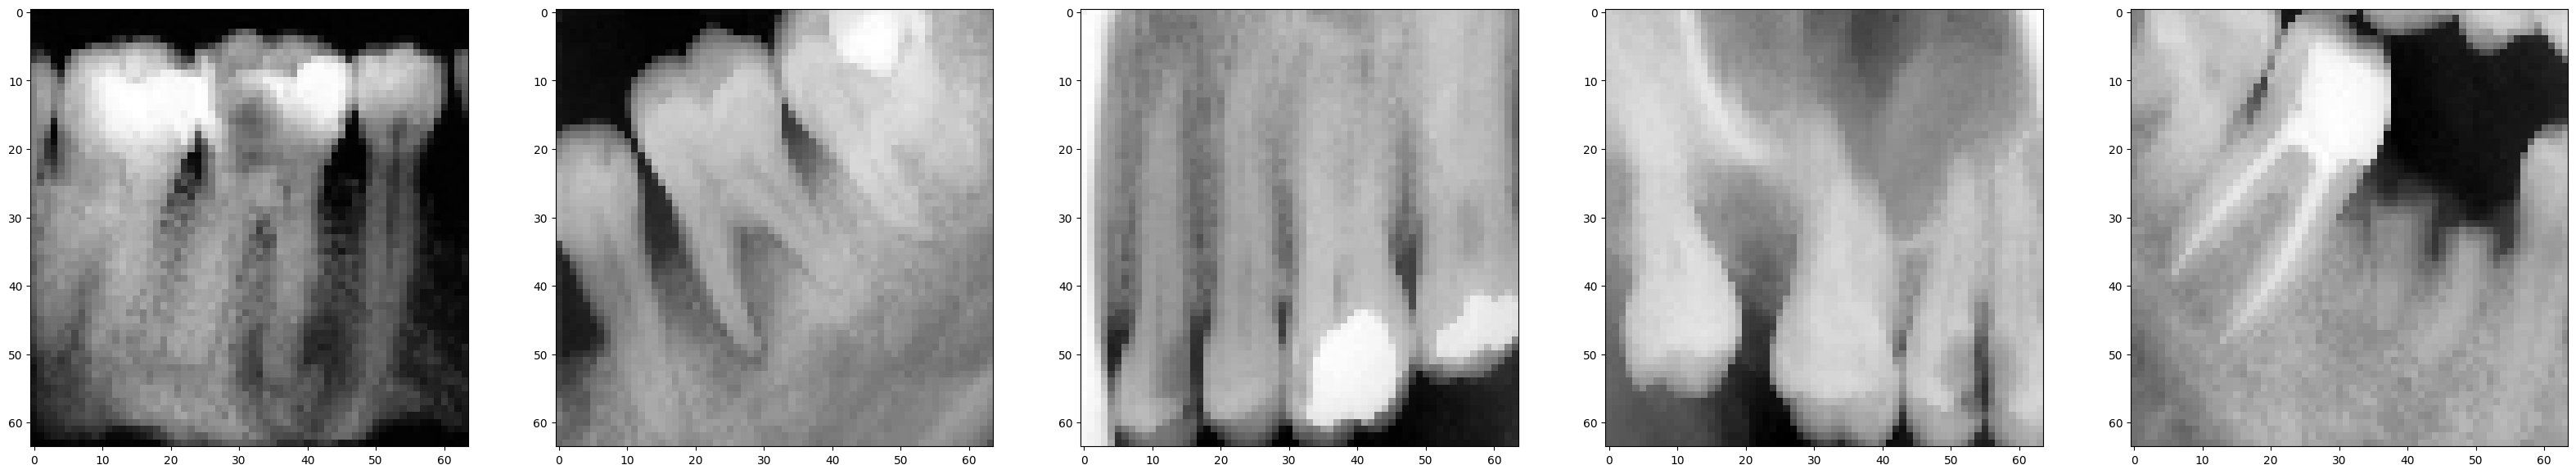

In [ ]:
show_img(train_df)

In [ ]:
noised_df= np.array(noised_df)

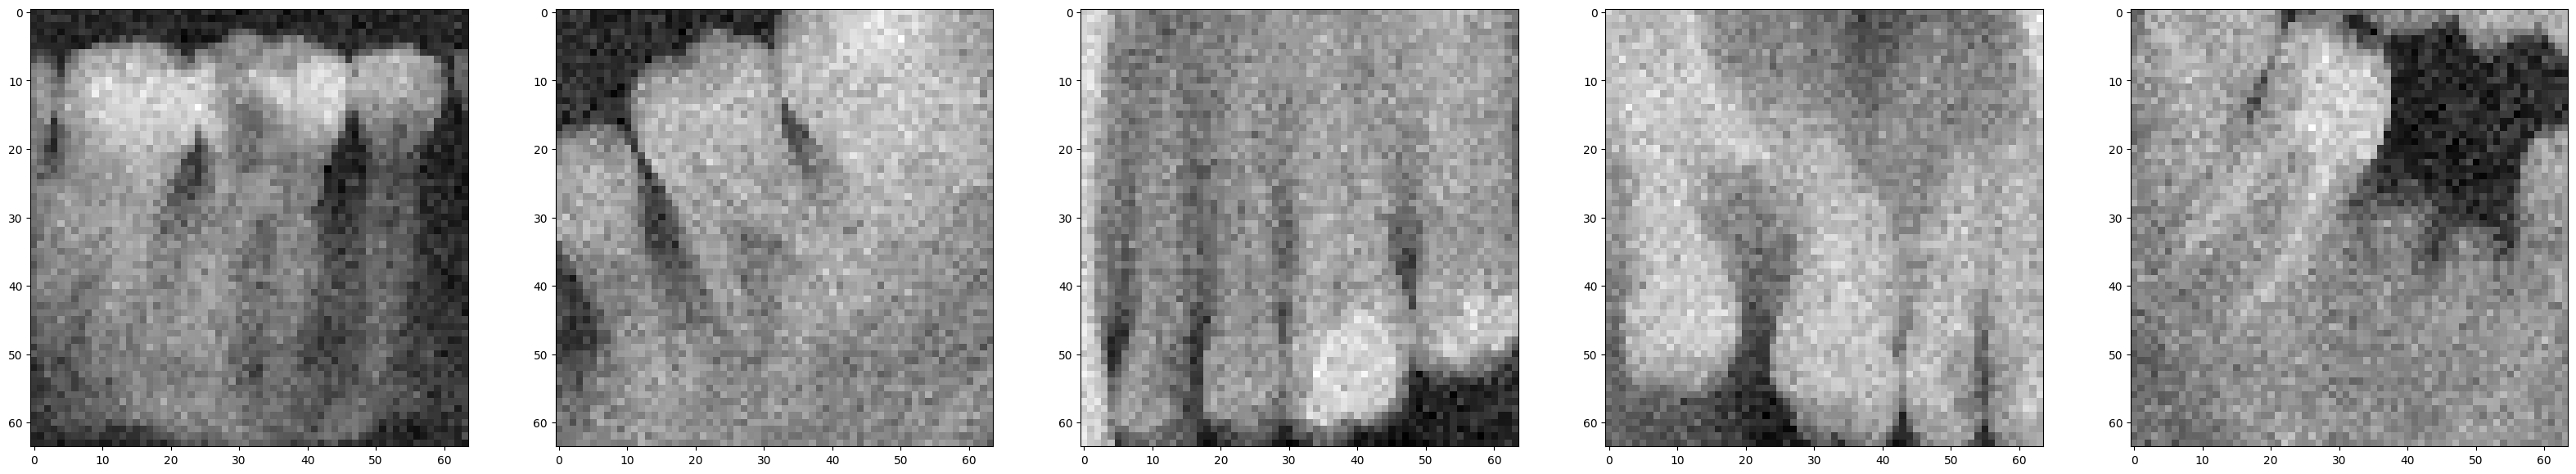

In [ ]:
show_img(noised_df)

In [ ]:
noised_df.shape

(120, 64, 64, 1)

In [ ]:
train_df.shape

(120, 64, 64, 1)

In [ ]:
xnoised= noised_df[0:100]
xtest= noised_df[100:]

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K

def autoencoder():

    input_img = Input(shape=(64,64,1), name='image_input')

    #enoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)

    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)

    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder


In [ ]:
model= autoencoder()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 64, 1)]       0         
                                                                 
 Conv1 (Conv2D)              (None, 64, 64, 64)        640       
                                                                 
 pool1 (MaxPooling2D)        (None, 32, 32, 64)        0         
                                                                 
 Conv2 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 pool2 (MaxPooling2D)        (None, 16, 16, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 16, 16, 64)        36928     
                                                                 
 upsample1 (UpSampling2D)    (None, 32, 32, 64)        0     

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
with tf.device('/device:GPU:0'):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    model.fit(xnoised, xnoised, epochs=40, batch_size=10, validation_data=(xtest, xtest), callbacks=[early_stopping])

Epoch 1/40
10/10 [==============================] - 5s 337ms/step - loss: 0.6659 - val_loss: 0.6237
Epoch 2/40
10/10 [==============================] - 2s 251ms/step - loss: 0.6083 - val_loss: 0.5935
Epoch 3/40
10/10 [==============================] - 2s 248ms/step - loss: 0.5865 - val_loss: 0.5817
Epoch 4/40
10/10 [==============================] - 2s 249ms/step - loss: 0.5760 - val_loss: 0.5772
Epoch 5/40
10/10 [==============================] - 4s 363ms/step - loss: 0.5731 - val_loss: 0.5829
Epoch 6/40
10/10 [==============================] - 3s 332ms/step - loss: 0.5734 - val_loss: 0.5709
Epoch 7/40
10/10 [==============================] - 2s 250ms/step - loss: 0.5694 - val_loss: 0.5697
Epoch 8/40
10/10 [==============================] - 2s 251ms/step - loss: 0.5660 - val_loss: 0.5673
Epoch 9/40
10/10 [==============================] - 3s 253ms/step - loss: 0.5640 - val_loss: 0.5657
Epoch 10/40
10/10 [==============================] - 4s 446ms/step - loss: 0.5629 - val_loss: 0.5655

In [ ]:
xtrain= train_df[100:]

1/1 [==============================] - 1s 657ms/step


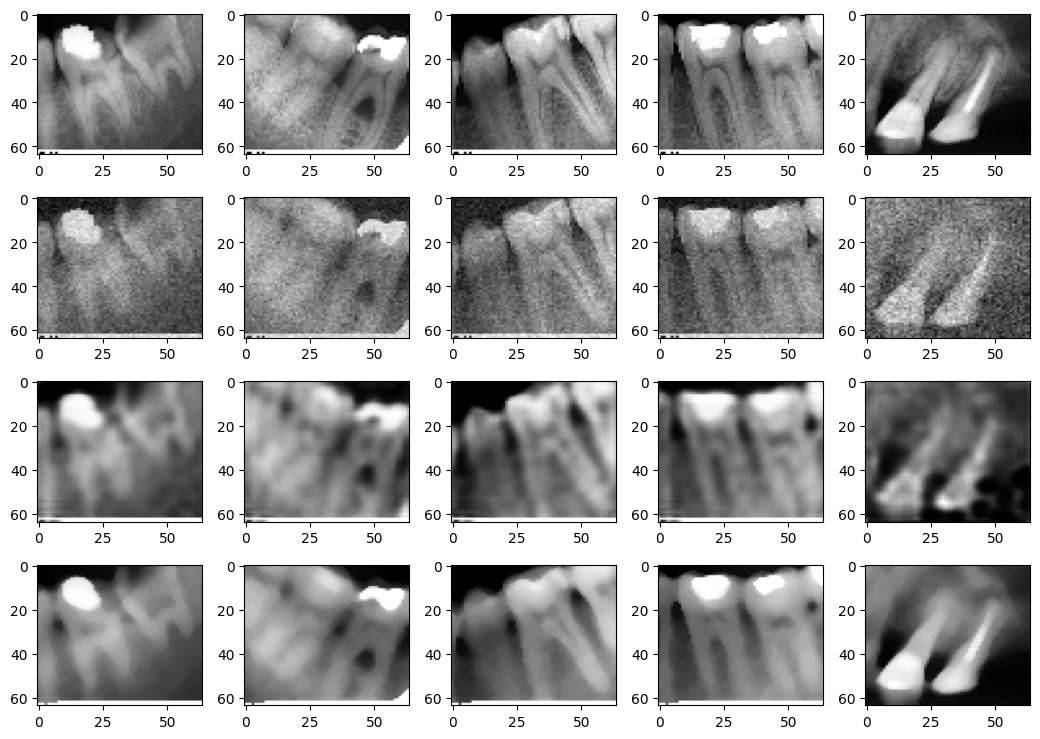

In [ ]:
import cv2

pred= model.predict(xtest[:5])
def plot_predictions(y_true, y_pred):
    f, ax = plt.subplots(4, 5)
    f.set_size_inches(10.5,7.5)
    for i in range(5):
        ax[0][i].imshow(np.reshape(xtrain[i], (64,64)), aspect='auto', cmap='gray')
        ax[1][i].imshow(np.reshape(y_true[i], (64,64)), aspect='auto', cmap='gray')
        ax[2][i].imshow(np.reshape(y_pred[i], (64,64)), aspect='auto', cmap='gray')
        ax[3][i].imshow(cv2.medianBlur(xtrain[i], (5)), aspect='auto', cmap='gray')

    plt.tight_layout()
plot_predictions(xtest[:5], pred[:5])

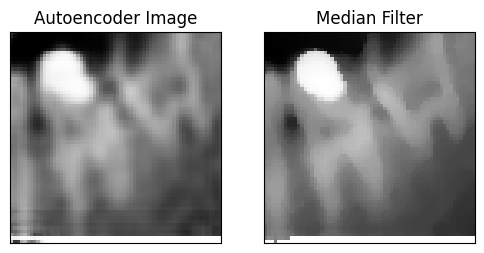

In [ ]:
new_image = cv2.medianBlur(xtrain[0], (5))
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(pred[0].reshape(64,64), cmap='gray')
plt.title('Autoencoder Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_image, cmap='gray')
plt.title('Median Filter')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
from math import log10, sqrt

def PSNR(original, denoiced):
    mse = np.mean((original - denoiced) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

value1 = PSNR(xtest[0], new_image)
value2 = PSNR(xtest[0], pred[0])

print(f"PSNR value for Denoised image is {value2} dB while for Median filtered image is {value1} dB")

PSNR value for Denoised image is 69.87597361790952 dB while for Median filtered image is 58.43467404060512 dB
